## Case 1 : Self-trained word_embed + Dense <br> <small>when you have abundant data available</small>

### Import data

In [38]:
from keras.datasets import imdb

max_features = 10000

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

In [39]:
x_train.shape

(25000,)

In [5]:
# x_train

array([ list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228

In [40]:
y_train.shape

(25000,)

In [7]:
# y_train

array([1, 0, 0, ..., 0, 1, 0])

### Pad X into maxlen

In [41]:
from keras import preprocessing

maxlen = 100

x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [42]:
x_train.shape

(25000, 100)

In [43]:
x_train

array([[1415,   33,    6, ...,   19,  178,   32],
       [ 163,   11, 3215, ...,   16,  145,   95],
       [1301,    4, 1873, ...,    7,  129,  113],
       ..., 
       [  11,    6, 4065, ...,    4, 3586,    2],
       [ 100, 2198,    8, ...,   12,    9,   23],
       [  78, 1099,   17, ...,  204,  131,    9]], dtype=int32)

### Train-validation split

In [201]:
import numpy as np

num_val_samples = int(x_train.shape[0] * 0.2)

indices = np.arange(x_train.shape[0])
np.random.shuffle(indices)
x_train = x_train[indices]
y_train = y_train[indices]


x_val = x_train[:num_val_samples]
y_val = y_train[:num_val_samples]
partial_x_train = x_train[num_val_samples:]
partial_y_train = y_train[num_val_samples:]

### Build the model

In [57]:
from keras import models
from keras import layers

embed_dim = 100

model = models.Sequential()
model.add(layers.Embedding(input_dim=max_features, output_dim=embed_dim, input_length=maxlen))

model.add(layers.Flatten())

model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_8 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 10001     
Total params: 1,010,001
Trainable params: 1,010,001
Non-trainable params: 0
_________________________________________________________________


In [58]:
from keras import optimizers
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=1e-3), 
              loss=losses.binary_crossentropy, 
              metrics=[metrics.binary_accuracy])

### Train the model

In [59]:
batch_size=32

history = model.fit(partial_x_train, 
                    partial_y_train, 
                    batch_size=batch_size, 
                    epochs=10, 
                    validation_data=(x_val, y_val), 
                    verbose=0)

In [20]:
history.history.keys()

dict_keys(['binary_accuracy', 'val_loss', 'val_binary_accuracy', 'loss'])

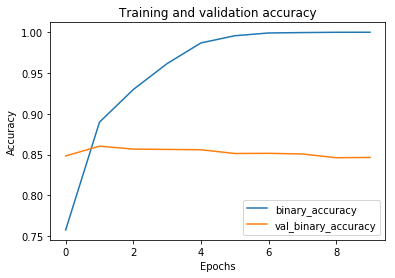

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.epoch, history.history['binary_accuracy'], label='binary_accuracy')
plt.plot(history.epoch, history.history['val_binary_accuracy'], label='val_binary_accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

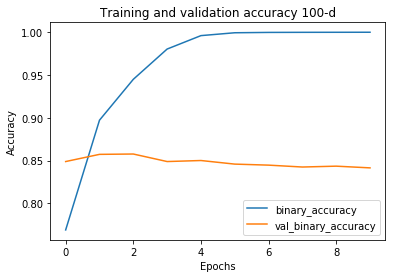

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.epoch, history.history['binary_accuracy'], label='binary_accuracy')
plt.plot(history.epoch, history.history['val_binary_accuracy'], label='val_binary_accuracy')
plt.title('Training and validation accuracy 100-d')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()